![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – Travaux Dirigés N°7
</div>

# STATIQUE DES FLUIDES
>Physique Chimie `CPGE PT` lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/info-pyhton.html </a>
    >> Sujet inspiré par diverses lectures sur le net. Merci à leurs contributeurs.trices

Dans ce notebook, on fait la `comparaison des profils de pression atmosphérique de deux modèles théoriques et du modèle standard`

In [2]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
# %matplotlib widget

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import interpolate
import matplotlib.pyplot as plt

# Trois profils de température atmosphérique
> **Question 1** :
> Le fluide air en statique est soumis à un ensemble de forces volumiques et surfaciques. Dans la modélisation la plus simple, les forces surfaciques se limitent aux forces de pression et les forces volumiques à celle de la pesanteur. En appliquant le principe fondamental de la statique projeté sur l'axe vertical $z$, démontrer l'équation différentielle suivante : $$\dfrac{\text{d}P}{\text{d}z}=-\mu g$$
où $z$ est l'altitude, $P$ la pression, $\mu$ la masse volumique locale et $g$ l'intensité de pesanteur.

> **Question 2** :
> En modélisant l'air comme un gaz parfait de masse molaire $M$, montrer que : 
$$\mu=\dfrac{PM}{RT}$$
où $R$ est la constante des gaz parfaits.

> **Question 3** :
> En déduire que : 
$$\dfrac{\text{d}P}{\text{d}z}=-\dfrac{PM}{RT} g$$

&nbsp; Il reste à caractériser l'évolution de la température $T=f(z)$.
Les divers modèles proposés sont les suivants :
* modèle isotherme $T=T_0=15°C$ ;
* modèle adiabatique $T=T_0\left(1-\alpha z\right)$ avec $\alpha=2.24.10^{-5}$ $°C/km$;
* modèle standard tabulé (voir les données ci-dessous qui seront interpolées par la méthode `interpolate.interp1d` (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html"> doc. </a>) de la librairie `scipy`.). 

&nbsp; On cherche à superposer les 3 profils de température dont voici les données utiles :

In [3]:
# Données générales
P0 = 1e5
g = 9.81
M = 29e-3
R = 8.314

# Atmosphère isotherme
T0 = 273+15

# Atmosphère adiabatique
alpha = 2.24e-05

# Atmosphère standard
z_data = np.array([0,1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000])
T_data = np.array([15, 8.5, 2.0, -4.49, -10.98, -17.47, -23.96, -30.45, -36.94, -43.42, -49.90, -56.50, -56.50, -51.60, -46.64, -22.8, -2.5, -26.13, -53.57, -74.51])

> **Question 4** :
> Compléter le programme suivant qui permet de superposer les 3 profils de température

In [5]:
# Atmosphère isotherme
def T_isoT(z):
    return ...................................

# Atmosphère adiabatique
def T_adiab(z):
    return ...................................

# Modèle valable pour z > 0 représenté jusqu'à 80km
z_isoT = np.linspace(0,80000,100000)
# Modèle valable pour 0 < z < 30km)
z_adiab = np.linspace(0,30000,100000)
# Modèle valable pour 0 < z < 80km
z_standard = np.linspace(0,79000,100000) #il semble qu'on doivent enlever la dernière valeur sinon elle est en trop pour odeint??

plt.figure("Courbes modèles de température atmosphérique")
plt.plot(T0*..................................., z_isoT, label="Modèle isotherme" )
plt.plot(T_adiab(z_adiab), z_adiab, label="Modèle adiabatique" )
plt.plot(T_data+..................................., z_data, label="Modèle standard" )
plt.xlabel("Température en K")
plt.ylabel("Altitude en m")
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (595383088.py, line 3)

# Atmosphère isotherme

> **Question 4**
> Résoudre l'équation différentielle pour en déduire $P(z)$ dans le cas isotherme

## Comparaison des méthodes d'Euler et Odeint

On va résoudre numériquement l'équation différentielle dans le cas d'une atmosphère isotherme avec les deux méthodes que nous connaissons: la méthode d'Euler et celle intégrée à Python nommée "Odeint" déjà vue précédemment. Pour montrer l'intérêt de la 2ème sur la première, on va imposer un pas spatial $dz$ de $1000 km$. 


Rappel : L'intégration numérique  de la méthode `odeint` se fait à l'aide de la librairie `scipy`. Elle permet de résoudre les équations différentielles écrites sous la forme $\frac{\text{d}x}{\text{d}t}=f(x,t)$ de façon plus précise que la méthode d'Euler à discrétisation identique. &nbsp;
Il faut donc créer une fonction `deriv_isoT`qui renvoie la valeur du second membre $f$ de l'équation différentielle et permet ensuite sa résolution. Attention, il faudra également créer une matrice de valeurs $T_0$ qui sera un des arguments de `odeint`
Pour plus d'informations : https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#odeint

> **Question 5** Compléter le programme suivant. Un fois les méthodes comparées, trouver le moyen d'améliorer le résultat avec la méthode d'Euler 

In [4]:
N=30000
dz=1000
Dz=R*T0/(M*g)

def f(P):
    return -P/Dz

Z = np.zeros(N+1)
P_1 = np.zeros(N+1)
Z[0]=0
P_1[0]=P0

#Méthode EULER ------------------------------------------------
for i in range(1,N+1):
    dP = ...................................
    # et on le rajoute à la valeur précédente pour avoir la nouvelle
    P_1[i] = ...................................
    # z s'incrémente aussi d'un pas
    Z[i] = ...................................

theorique = ...................................
plt.plot(................................... , label = 'méthode analytique')
plt.plot(...................................'o', label = 'méthode Euler')
plt.ylabel('Altitude $z$ (km)')
plt.xlabel('Pression $P1$ (V)')
plt.ylim(0, N)
plt.grid()
plt.legend()

#Méthode ODEINT-----------------------------------------------
# rappel: on a déjà écrit def T_isoT(z):
#                             return T0

def deriv_isoT(P,z):
    return ..................................

P_isoT = odeint(...................................)

plt.figure("Courbes de pression calculées")
plt.plot((...................................) , label = 'méthode analytique')
plt.plot((...................................),'o', label="Méthode Odeint")
plt.legend()
plt.xlabel("Pression en Pa")
plt.ylabel("Altitude en m")
plt.ylim(0,30000)
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (50396823.py, line 15)

# Calcul et comparaison des 3 profils de pression

## Préliminaire : interpolation d'une liste de valeurs

Avant d'aller plus loin, sachant que nous allons traiter un grand nombre de valeurs quelque soit le profil de températues et que la liste de T_data dans le cas de l'atmosphère standard est limitée par des valeurs fixes, on propose de faire une interpolation simple entre les valeurs afin de disposer d'un nombre quelconque de valeurs et surtour de transformer la matrice de valeurs en fonction. Pour le comprendre, rendez-vous à https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html pour vous familiariser avec la fonction `interpolate.interp1d` de la bibliothèque `scipy`

Voici un exemple pour l'illustrer. Représenter les deux courbes : originale et interpolée.

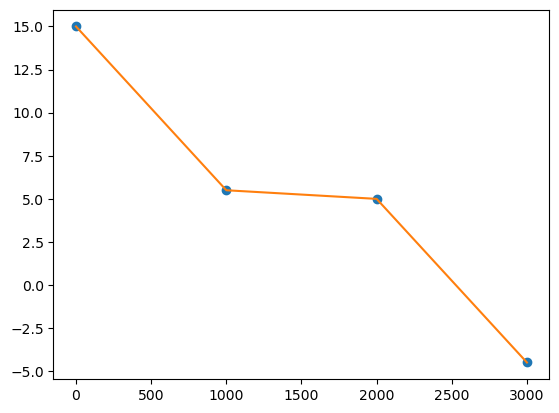

In [32]:
x = np.array([0,1000, 2000, 3000])
y = np.array([15, 5.5, 5.0, -4.49])
plt.plot(x,y,'o')

x_new=np.linspace(0,3000,1000)
f=interpolate.interp1d(x,y)
y_new=f(x_new)
plt.plot(x_new,y_new,'-')

> **Question 6** Faites l'interpolation des valeurs de la température dans le cas de l'atmosphère standard en créant une nouvelle matrice T_standard qui comprendra les valeurs interpolées de T_data et représenter le profil :

In [3]:
T_standard = interpolate.interp1d((...................................))
plt.plot((...................................),z_standard)

SyntaxError: invalid syntax (4071284626.py, line 1)

## Résolution pour les 3 profils

In [1]:
def deriv_isoT(P,z):
    return (...................................)

def deriv_adiab(P,z):
    return (...................................)

def deriv_standard(P,z):
    return (...................................)


P_isoT = odeint((...................................))


P_adiab = odeint((...................................))


P_standard = odeint((...................................))

SyntaxError: invalid syntax (2664050664.py, line 2)

> **Question 7** Représenter les 3 profils de pression atmosphérique.

In [2]:
plt.figure("Courbes de pression calculées")
plt.plot(P_isoT,z_isoT, label="Approche numérique isotherme")

plt.plot(P_adiab,z_adiab, label="Approche numérique adiabatique")

plt.plot(P_standard,z_standard, label="Approche numérique standard")
plt.legend()
plt.xlabel("Pression en Pa")
plt.ylabel("Altitude en m")
plt.ylim(0,30000)
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined